In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 불러오기 및 확인

In [2]:
df = pd.read_csv("C:/pandas_datasets/Pandas_Data/vehicles.csv")

In [3]:
df.shape

(426880, 26)

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
df.isna().sum()


id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 자동차 연식
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    posting_date : 시스템에 기록된 날짜


In [7]:
# inplace = True - drop 후 남아 있는 데이터를 그대로 df에 할당
df.drop(['id', 'url', 'region_url', 'title_status', 'VIN', 'image_url', 
         'description', 'county','state','lat','long', 'posting_date', 'region'], 
         axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [8]:
df.isnull().sum() # 결측값 확인 

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [10]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [11]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

# 문자열 시각화 탐색

총 갯수: 42


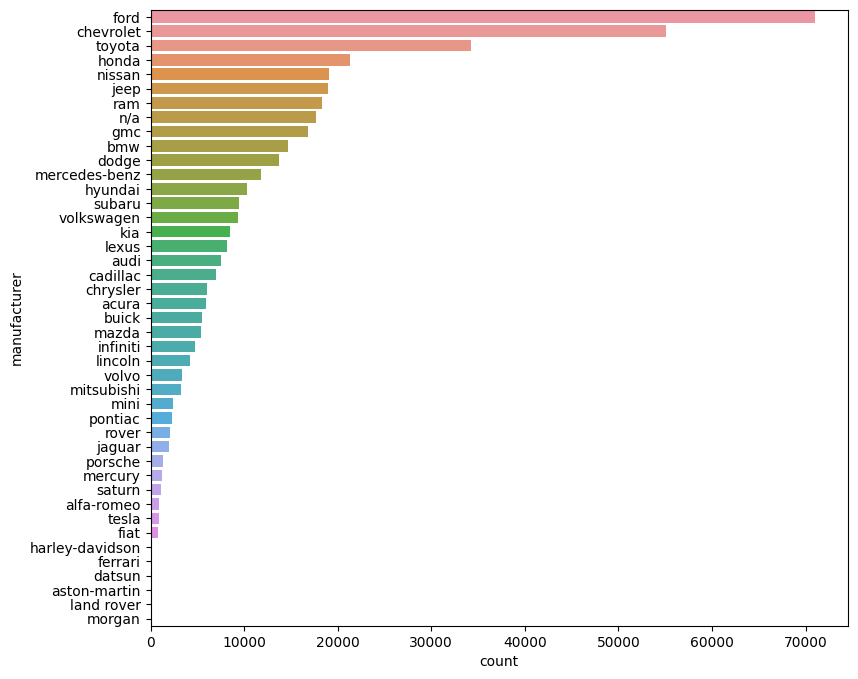

In [12]:
fig = plt.figure(figsize = (9, 8))
sns.countplot(y = 'manufacturer', data = df.fillna('n/a'),
             order = df.fillna('n/a')['manufacturer'].value_counts().index)
print('총 갯수:', len(df['manufacturer'].value_counts()))

In [13]:
print(df['manufacturer'].fillna('n/a').value_counts().sum())
print(df['manufacturer'].fillna('n/a').value_counts())

426880
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
n/a                17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsu

In [14]:
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
    print(model, num)

f-150 8009
silverado 1500 5140
1500 4211
camry 3135
silverado 3023
accord 2969
wrangler 2848
civic 2799
altima 2779
escape 2746
2500 2687
tacoma 2582
explorer 2499
grand cherokee 2489
corolla 2241
mustang 2225
fusion 1979
equinox 1972
cr-v 1930
focus 1832
malibu 1764
tahoe 1729
charger 1719
corvette 1711
rav4 1701
sonata 1686
impala 1682
sierra 1500 1658
grand caravan 1601
cruze 1559
outback 1551
silverado 2500hd 1545
f-250 1529
elantra 1498
odyssey 1494
3500 1491
edge 1471
prius 1435
tundra 1425
jetta 1384
rogue 1332
forester 1318
sentra 1288
sierra 1282
wrangler unlimited 1273
camaro 1159
soul 1137
pilot 1118
c-class 1117
sienna 1116
f-350 1116
f150 1089
cherokee 1078
4runner 1073
highlander 1068
suburban 1066
expedition 1058
traverse 985
impreza 960
optima 958
challenger 953
acadia 925
3 series 917
sierra 2500hd 895
e-class 885
yukon 884
x5 880
santa fe 826
taurus 820
200 817
ranger 813
terrain 801
colorado 798
durango 794
f250 791
mdx 791
sorento 790
journey 779
escalade 773
enclav

<Axes: xlabel='count', ylabel='condition'>

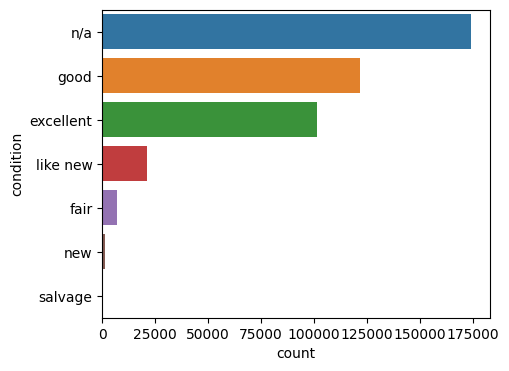

In [15]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'condition', data = df.fillna('n/a'),
             order = df.fillna('n/a')['condition'].value_counts().index)

In [16]:
print(df['condition'].fillna('n/a').value_counts().sum())
print(df['condition'].fillna('n/a').value_counts())

426880
condition
n/a          174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


salvage 거진 폐차 직전  
like new 둘 다 나쁨으로 하기   

fair, new 보통으로 ...?  
  
good, excelellent 좋음 

In [17]:
426880-174104

252776

In [18]:
0.5748828710644678+0.017264805097451274+0.40785232383808095

1.0

In [19]:
230-220*(1/2)

120.0

In [20]:
df['fuel']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
426875       gas
426876       gas
426877    diesel
426878       gas
426879       gas
Name: fuel, Length: 426880, dtype: object

In [21]:
df['fuel'].fillna('n/a').value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
n/a           3013
electric      1698
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='fuel'>

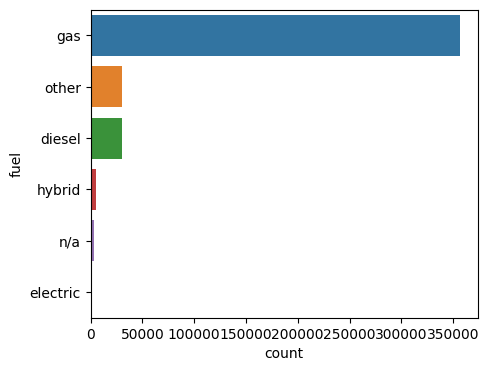

In [22]:
fig = plt.figure(figsize = (5, 4))
sns.countplot(y = 'fuel', data = df.fillna('n/a'),
             order = df.fillna('n/a')['fuel'].value_counts().index)

In [23]:

# 함수를 정의하여 중복 코드 제거
def process_categorical_column(df, col, n_cnt):
    # 누락된 값을 'others'로 채웁니다.
    df[col] = df[col].fillna('others')
    # other이라고 이미 되어 있는 값들 others로 변환
    df.loc[df[col] == 'other', col] = 'others'
    counts = df[col].value_counts()
    
    # 상위 'n_cnt'개의 범주를 유지하고 나머지는 'others'로 대체합니다. 
    others = counts.index[n_cnt:]
    df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')


# manufacturer 열 처리
process_categorical_column(df, 'manufacturer', 4)

# cylinders 열 처리
process_categorical_column(df, 'cylinders', 4)

# fuel 열 처리
process_categorical_column(df, 'fuel', 3)

# condition 열 처리
process_categorical_column(df, 'condition', 3)

# model 열 처리
process_categorical_column(df, 'model', 10)

# transmission 열 처리
process_categorical_column(df, 'transmission', 3)

# drive 열 처리
process_categorical_column(df, 'drive', 3)

# size 열 처리
process_categorical_column(df, 'size', 2)

# type 열 처리
process_categorical_column(df, 'type', 8)

# paint_color 열 처리
process_categorical_column(df, 'paint_color', 10)


In [24]:
df.isnull().sum()

price              0
year            1205
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer        4400
transmission       0
drive              0
size               0
type               0
paint_color        0
dtype: int64

In [25]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,6000,NaN,others,others,others,others,others,NaN,others,others,others,others,others
1,11900,NaN,others,others,others,others,others,NaN,others,others,others,others,others
2,21000,NaN,others,others,others,others,others,NaN,others,others,others,others,others
3,1500,NaN,others,others,others,others,others,NaN,others,others,others,others,others
4,4900,NaN,others,others,others,others,others,NaN,others,others,others,others,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,others,others,good,6 cylinders,gas,32226.0,others,fwd,others,sedan,others
426876,30590,2020.0,others,others,good,others,gas,12029.0,others,fwd,others,sedan,red
426877,34990,2020.0,others,others,good,others,diesel,4174.0,others,others,others,hatchback,white
426878,28990,2018.0,others,others,good,6 cylinders,gas,30112.0,others,fwd,others,sedan,silver


# 수치형 자료

In [26]:
df['odometer'].isnull().sum()

4400

<Axes: xlabel='price', ylabel='year'>

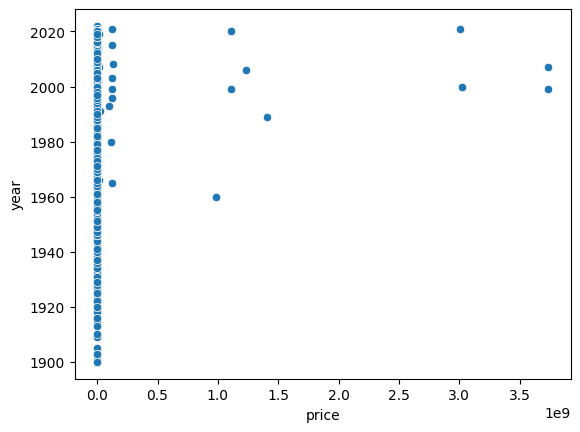

In [27]:
sns.scatterplot(x='price', y='year', data=df)

In [28]:
print("최고 가격 $: {}".format(df['price'].max()))
print('최저 가격 $: {}'.format(df['price'].min()))

최고 가격 $: 3736928711
최저 가격 $: 0


<Axes: xlabel='odometer', ylabel='year'>

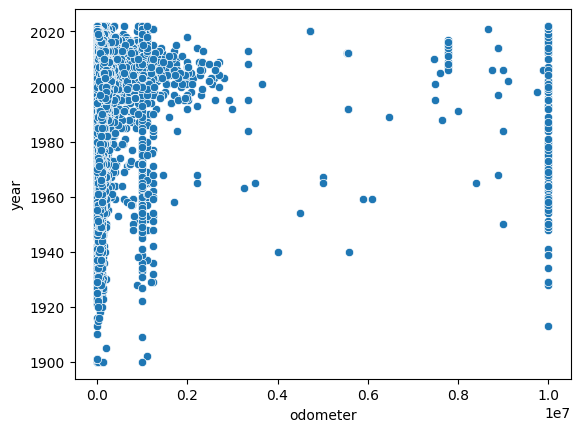

In [29]:
sns.scatterplot(x='odometer', y='year', data=df)

In [30]:
print("최고: {}".format(df['odometer'].max()))
print('최저: {}'.format(df['odometer'].min()))

최고: 10000000.0
최저: 0.0


In [31]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기

p1 = df['price'].quantile(0.95) # 상위 5%
p2 = df['price'].quantile(0.10)  # 하위 10%

df = df[(df['price'] < p1) & (df['price'] > p2)]

In [32]:
df['price'].min()

501

In [33]:
o1 = df['odometer'].quantile(0.95) # 상위 5%
o2 = df['odometer'].quantile(0.05)  # 하위 5%

df = df[(df['odometer'] < o1) & (df['odometer'] > o2)]

<Axes: xlabel='price', ylabel='year'>

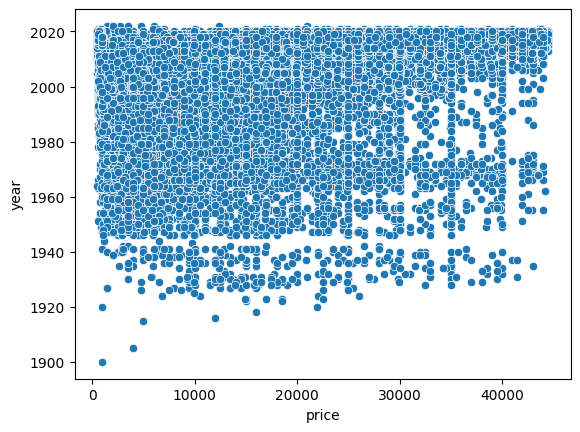

In [34]:
sns.scatterplot(x='price', y='year', data=df)

In [35]:
df['price'].min()

501

<Axes: xlabel='odometer', ylabel='year'>

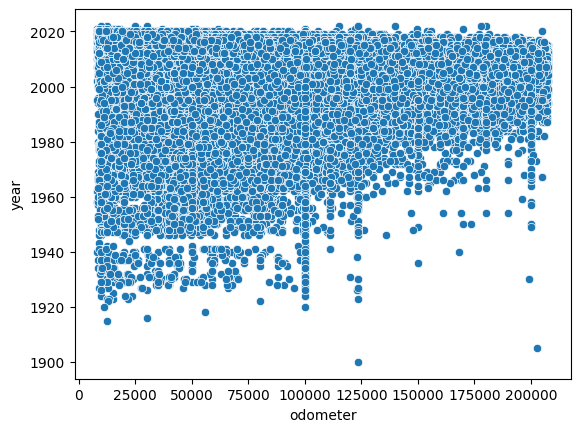

In [36]:
sns.scatterplot(x='odometer', y='year', data=df)

In [37]:
df['odometer'].min()

8158.0

In [38]:
print(df['year'].isnull().sum())
print(df['odometer'].isnull().sum())

551
0


In [39]:
columns_to_fill = ['year', 'odometer']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())


In [40]:
print(df['year'].isnull().sum())
print(df['odometer'].isnull().sum())

0
0


In [41]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [42]:
df.corr(method='pearson', numeric_only=True).T.style.background_gradient(cmap = "YlOrRd")

,price,year,odometer
price,1.000000,0.403467,-0.575445
year,0.403467,1.000000,-0.333491
odometer,-0.575445,-0.333491,1.000000


In [45]:
df.describe()

,price,year,odometer
count,324410.000000,324410.000000,324410.000000
mean,17170.524494,2011.067968,92847.478515
std,11038.339315,8.680011,52402.966355
min,501.000000,1900.000000,8158.000000
25%,7900.000000,2008.000000,46000.000000
50%,14995.000000,2013.000000,91400.000000
75%,25497.750000,2016.000000,133000.000000
max,44499.000000,2022.000000,207603.000000


<Axes: >

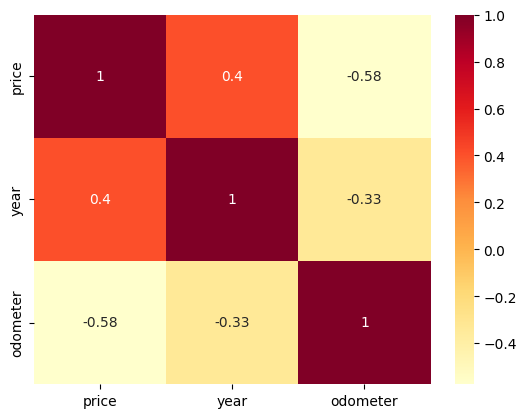

In [44]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'YlOrRd')

In [49]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 이용해 수치형 데이터를 표준화하기
X_num = df[['odometer', 'year']]

scaler = StandardScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)  # 타입이 Sereis이기 때문에 변환이 필요함. 
X_scaled = pd.DataFrame(X_scaled, index= X_num.index, columns=X_num.columns) # 데이터프레임으로 변환

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price', 'odometer', 'year'], axis=1)
X_cat = pd.get_dummies(X_cat)

# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

print(X.shape)

(324410, 53)


In [50]:
from sklearn.model_selection import train_test_split

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

In [60]:
from sklearn.svm import LinearSVR
model = LinearSVR(epsilon=0.5, random_state=43) 
model.fit(X_train, y_train) # 모델 학습

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=0.5, random_state=43)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [63]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))


MAE: 30.15%
RMSE: 41.53%
